<a href="https://colab.research.google.com/github/YoonJiHwan98/BigContest_Project/blob/Jihwan/code/bigcon_data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022 빅콘테스트 

## 문제

앱 사용성 데이터를 통한 대출신청 예측분석


---


가명화된 데이터를 기반으로 고객의 대출상품 신청여부 예측
(2022년 3~5월 데이터제공 / 2022년 6월 예측)
* 예측모델을 활용하여 탐색적 데이터 분석 수행
* 대출신청, 미신청 고객을 분류하여 고객의 특성 분석결과 도출



- 회원 가입 이후 특정 기간안에 대출 신청 여부를 예측
  
- 핀다 홈화면 진입 고객의 모델 기반 고객 군집 분석
  
  모두가 대출을 원하진 않는다!
  
  여러 고객 군집별로 서비스 메시지를 제안한다.

- 비교대출 서비스
    - 최적의 대출 경험 제공
    - 고객 정보 제출 - 대출 조건을 받아 비교 선택
    - 핀다 사용자 **10명 중 6명은 중금리대출**
    - 인터넷 은행이 채우지 못한 중금리대출의 니즈를 채워줌
    - 핀다의 홈화면 진입 고객 중 특정 기간 안에 대출 신청 고객을 예측

<신청 과정>

- 홈화면을 통해 신청 시작
- 회원 가입을 통해 정보 수집
- 홈화면의 대출신청 버튼을 통해 대출목적, 희망금액 입력
- 자산정보입력
- 인증서 사용여부 선택
1. 회원 가입 이후 특정 기간안에 대출 신청 여부를 예측
    
    최종 모델평가는 승인된 상품 정보 기준 하나 이상을 선택해 대출한 고객을 예측하는 것
    
    → 예측 정확도 평가 지표 : (이진분류) F1-score
    
    모델링 정확도 만큼이나 데이터 분석, 모델링 과정을 평가에 반영
    
    label = 앱 사용자가 대출 조회를 하고, 승인된 금융상품 중 최소 하나를 선택하여 실제 대출을 실행한 경우 y로 표시
    
    학습 데이터와 시점상 크게 다르지 않음
    
    → 직전 데이터의 영향이 너무 크지 않도록
    
2. 핀다 홈화면 진입 고객의 모델 기반 고객 군집 분석
    
    앱 사용자 모두가 대출을 원하진 않는다!
    
    여러 고객 군집별로 서비스 메시지를 제안한다.
    
    통계적 군집 분석 과정의 타당성과 서비스 메시지의 독창성을 평가

## 결과 제출 방식

* target : loan_result['is_applied'] # 대출 신청여부

* PPT
1. 자유양식
2. 분량제한없음
3. 파워포인트(PPT)파일형식으로 제출 (파일명은 “분야명_주제명_개인/팀명＂으로 작성)
4. 필요시 설명자료(한글, 워드파일) 추가 제출 가능

## 심사 기준

	고객 당 대출 신청 여부 예측, 데이터 수집, 전처리 과정, 예측 모델 해석(필수)

## 이번에 주의할 것


* 탐색적 데이터 분석 수행이라고 박아놓은거 보면 EDA & 전처리 과정에 대한 "이유"를 상세히 적어놔야 할 것 같다

* 단순한 분류 accuracy 뿐 아니라 고객의 "특성 분석 결과"를 도출해내는 것이 중요한 것 같다



## 간략한 인사이트


* 유저 스펙에서 중요한 부분 : 은
* 유저 로그 데이터 어떻게 이용할지 -> count?

고객 스펙 -> 어떤게 추천이 되는지? 핀다 직접 깔아봐야겠다

추천된 것들 중에 고객이 선택할지 말지니까...


어플 이용층 : 젊은 층이 주로 사용하지 않을까 싶음

고객 스펙 데이터 중 나이를 알아보고 그 유저층이 무엇을 중요하게 생각하는지, 어떤 대출을 주로 받는지 인사이트 추가적으로 조사할 것?


유저 로그 데이터 -> 군집화에 주로 이용될듯

## 드라이브 마운트 & 저장 경로 설정

In [151]:
# 드라이브 마운트
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [152]:
import os

ROOT_DIR = "/content/gdrive/My Drive/빅콘테스트_2022/"
DATA_PATH = ROOT_DIR + "data/"
IMAGE_PATH = ROOT_DIR + "img/"

os.makedirs(DATA_PATH, exist_ok = True)
os.makedirs(IMAGE_PATH, exist_ok = True)

In [153]:
# 불필요한 경고 무시
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 데이터 불러오기 및 확인

In [154]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format

In [156]:
def load_data(file_name, DATA_PATH=DATA_PATH):
  file_path = os.path.join(DATA_PATH, file_name)
  return pd.read_csv(file_path)

In [157]:
user_spec = load_data("user_spec.csv")
log_data = load_data("log_data.csv")
loan_result = load_data("loan_result.csv")

In [158]:
user_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.00000,1.00000,2022-06-07 06:28:18,660.00000,108000000.00000,PRIVATEBUSINESS,20151101.00000,기타,자가,1000000.00000,기타,0.00000,NaN,4.00000,162000000.00000
1,954900,553686,1968.00000,1.00000,2022-06-07 14:29:03,870.00000,30000000.00000,PRIVATEBUSINESS,20070201.00000,정규직,기타가족소유,30000000.00000,대환대출,0.00000,NaN,1.00000,27000000.00000
2,137274,59516,1997.00000,1.00000,2022-06-07 21:40:22,710.00000,30000000.00000,FREELANCER,20210901.00000,기타,기타가족소유,10000000.00000,생활비,0.00000,NaN,5.00000,15000000.00000
3,1570936,167320,1989.00000,1.00000,2022-06-07 09:40:27,820.00000,62000000.00000,EARNEDINCOME,20170101.00000,정규직,자가,2000000.00000,생활비,0.00000,NaN,7.00000,344000000.00000
4,967833,33400,2000.00000,1.00000,2022-06-07 08:55:07,630.00000,36000000.00000,EARNEDINCOME,20210901.00000,정규직,기타가족소유,5000000.00000,생활비,0.00000,0.00000,1.00000,16000000.00000


In [159]:
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [160]:
len(user_spec), len(loan_result) # row 개수 확인

(1394216, 13527363)

# 전처리

## User_spec

### birth_year

Gender 스케일 진행 X, Null 값은 일단 없는 행 평균값 넣기

In [161]:
user_spec['birth_year'].describe()

count   1381255.00000
mean       1983.28492
std          10.67367
min        1927.00000
25%        1976.00000
50%        1984.00000
75%        1992.00000
max        2008.00000
Name: birth_year, dtype: float64

In [162]:
user_spec['birth_year'] = user_spec['birth_year'].fillna(user_spec['birth_year'].mean())

### Gender

Gender 0 1 알수없음 으로 변경

In [163]:
user_spec['gender'] = user_spec['gender'].fillna(9)

In [164]:
user_spec['gender'] = user_spec['gender'].astype(str)

In [165]:
user_spec['gender'].replace(9,'NORESPONSE',inplace = True)

### Credit score

100 단위로 1 ~ 9 까지 카테고리로 나눴고 NaN 값은 0 으로 했습니다.

In [166]:
user_spec['credit_score']

0         660.00000
1         870.00000
2         710.00000
3         820.00000
4         630.00000
             ...   
1394211   590.00000
1394212   980.00000
1394213   750.00000
1394214   640.00000
1394215         NaN
Name: credit_score, Length: 1394216, dtype: float64

In [167]:
user_spec['credit_score'] = user_spec['credit_score'].fillna(-10)

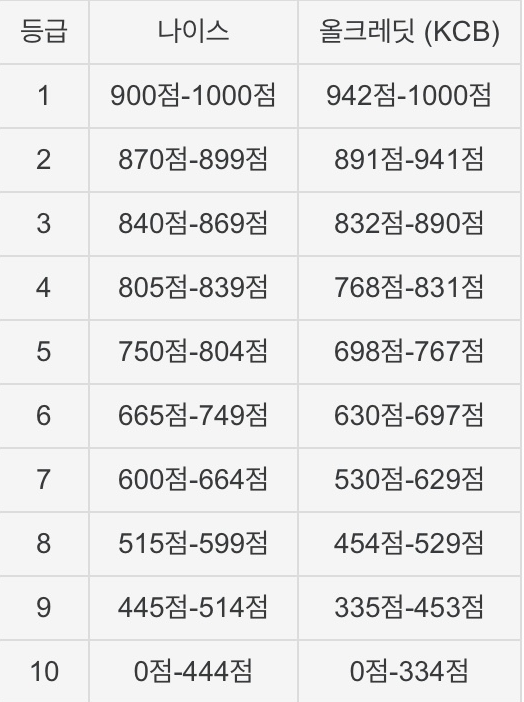

In [168]:
def credit_score_cal(x):
    if (900 <= int(x) < 1000):
        return 1
    elif (870 <= int(x) < 899):
        return 2
    elif (840 <= int(x) < 869):
        return 3
    elif (805 <= int(x) < 839):
        return 4
    elif (750 <= int(x) < 804):
        return 5
    elif (665 <= int(x) < 749):
        return 6
    elif (600 <= int(x) < 664):
        return 7
    elif (515 <= int(x) < 599):
        return 8
    elif (445 <= int(x) < 514):
        return 9
    elif (0 <= int(x) < 444):
        return 10
    else: return 0


In [169]:
user_spec['credit_score'] = user_spec['credit_score'].apply(lambda x : credit_score_cal(x))

### yearly_income

0 으로 채워넣었습니댯

In [170]:
user_spec['yearly_income'] = user_spec['yearly_income'].fillna(0)

### 'income_type','employment_type','houseown_type','desired_amount','purpose'

NaN 은 'NORESPONSE' 로 채워넣었습니다

In [171]:
user_spec[['income_type','employment_type','houseown_type','desired_amount','purpose']] = user_spec[['income_type','employment_type','houseown_type','desired_amount','purpose']].fillna('NORESPONSE')

### company_enter_month

In [172]:
#user_spec['company_enter_month'] = user_spec['company_enter_month'].fillna(111101)

In [173]:
from datetime import datetime

now = datetime.now()

In [174]:
def cal_company_month(dataframe):
  df = dataframe.copy()
  df['company_enter_month'] = df['company_enter_month'].fillna('0') # ValueError 발생 막기 위해 결측치부터 채우기
  now_series = pd.Series([now] * len(df)) # 현재 시간 series로 생성

  df['company_enter_month'] = df['company_enter_month'].astype('int') # int형으로 변환 (소수점 자르기)
  df['company_enter_month'] = df['company_enter_month'].astype('str') # 문자형으로 변환

  df['company_enter_month'] = df['company_enter_month'].str.slice(start=0, stop=6) # 일 단위 잘라내기

  df.replace({'company_enter_month': {'0' : now}}, inplace=True) # 현재 시간으로 결측치 채우기

  # 나머지 값들 datetime으로 자료형 변환
  df['company_enter_month'] = df['company_enter_month'].apply(lambda x : datetime.strptime(x, '%Y%m') if type(x) != datetime else x)

  df['company_month'] = (now - df['company_enter_month']).dt.days # 재직일수 계산
  df['company_month'] /= 30 # 개월 수 계산해서 열에 삽입
  df['company_month'] = df['company_month'].astype('int')

  df.drop(['company_enter_month'], axis=1, inplace=True)

  return df

In [175]:
user_spec = cal_company_month(user_spec)

In [176]:
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                                   0
gender                                       0
insert_time                                  0
credit_score                                 0
yearly_income                                0
income_type                                  0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
company_month                                0
dtype: int64

In [177]:
user_spec[['personal_rehabilitation_yn','personal_rehabilitation_complete_yn']] = user_spec[['personal_rehabilitation_yn','personal_rehabilitation_complete_yn']].fillna(0).astype(int)

In [178]:
def personal_rehabill(dataframe) :
    df = dataframe.copy()
    df['personal_rehabilitation'] = 0
    for i in range(len(df)):
        if (df['personal_rehabilitation_complete_yn'][i] == 1):
            df['personal_rehabilitation'][i] = 1 # 납입 완료 
        elif (df['personal_rehabilitation_complete_yn'][i] == 0) & (df['personal_rehabilitation_yn'][i] == 1):
            df['personal_rehabilitation'][i] = 0 # 납입 미완료
        else:
            df['personal_rehabilitation'][i]  = 2 # 개인회생 진행 X 
    return df

In [179]:
#(user_spec['personal_rehabilitation_complete_yn'] == 1).bool()

In [180]:
user_spec = personal_rehabill(user_spec)
#user_spec[['personal_rehabilitation_yn','personal_rehabilitation_complete_yn']] == 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [181]:
user_spec = user_spec.drop(columns=['personal_rehabilitation_yn','personal_rehabilitation_complete_yn'])

### existing_loan_cnt, existing_loan_amt

In [182]:
user_spec[['existing_loan_cnt','existing_loan_amt']] = user_spec[['existing_loan_cnt','existing_loan_amt']].fillna(0)

In [183]:
user_spec.info() ## Nan 처리 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   application_id           1394216 non-null  int64  
 1   user_id                  1394216 non-null  int64  
 2   birth_year               1394216 non-null  float64
 3   gender                   1394216 non-null  object 
 4   insert_time              1394216 non-null  object 
 5   credit_score             1394216 non-null  int64  
 6   yearly_income            1394216 non-null  float64
 7   income_type              1394216 non-null  object 
 8   employment_type          1394216 non-null  object 
 9   houseown_type            1394216 non-null  object 
 10  desired_amount           1394216 non-null  object 
 11  purpose                  1394216 non-null  object 
 12  existing_loan_cnt        1394216 non-null  float64
 13  existing_loan_amt        1394216 non-null 

## loan_result

In [184]:
loan_result.isnull().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
dtype: int64

### loan_limit, loan_rate

중앙값으로 채워넣기

In [185]:
loan_result[['loan_limit','loan_rate']] = loan_result[['loan_limit','loan_rate']].fillna(loan_result[['loan_limit','loan_rate']].median())

In [186]:
loan_result.isnull().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                     0
loan_rate                      0
is_applied               3257239
dtype: int64

## train, test 으로 분류

In [187]:
user_loan = pd.merge(loan_result, user_spec, on='application_id')
print(len(user_loan))
user_loan.head()

13527250


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,company_month,personal_rehabilitation
0,1748340,2022-06-07 13:05:41,7,191,42000000.00000,13.60000,NaN,430982,1996.00000,1.0,2022-06-07 13:05:39,7,24000000.00000,EARNEDINCOME,정규직,자가,25000000.00000,대환대출,2.00000,15000000.00000,7,2
1,1748340,2022-06-07 13:05:41,25,169,24000000.00000,17.90000,NaN,430982,1996.00000,1.0,2022-06-07 13:05:39,7,24000000.00000,EARNEDINCOME,정규직,자가,25000000.00000,대환대출,2.00000,15000000.00000,7,2
2,1748340,2022-06-07 13:05:41,2,7,24000000.00000,18.50000,NaN,430982,1996.00000,1.0,2022-06-07 13:05:39,7,24000000.00000,EARNEDINCOME,정규직,자가,25000000.00000,대환대출,2.00000,15000000.00000,7,2
3,1748340,2022-06-07 13:05:41,4,268,29000000.00000,10.80000,NaN,430982,1996.00000,1.0,2022-06-07 13:05:39,7,24000000.00000,EARNEDINCOME,정규직,자가,25000000.00000,대환대출,2.00000,15000000.00000,7,2
4,1748340,2022-06-07 13:05:41,11,118,5000000.00000,16.40000,NaN,430982,1996.00000,1.0,2022-06-07 13:05:39,7,24000000.00000,EARNEDINCOME,정규직,자가,25000000.00000,대환대출,2.00000,15000000.00000,7,2


In [188]:
user_loan.isnull().sum()

application_id                   0
loanapply_insert_time            0
bank_id                          0
product_id                       0
loan_limit                       0
loan_rate                        0
is_applied                 3257239
user_id                          0
birth_year                       0
gender                           0
insert_time                      0
credit_score                     0
yearly_income                    0
income_type                      0
employment_type                  0
houseown_type                    0
desired_amount                   0
purpose                          0
existing_loan_cnt                0
existing_loan_amt                0
company_month                    0
personal_rehabilitation          0
dtype: int64

In [189]:
# 모델 학습에 사용하지 않을 칼럼 삭제
user_loan = user_loan.drop(columns = ['loanapply_insert_time','insert_time'])

In [190]:
user_loan_test = user_loan[user_loan['is_applied'].isnull()]
user_loan_train = user_loan[~user_loan['is_applied'].isnull()]

In [191]:
# user_loan_train.to_csv('/content/gdrive/MyDrive/빅콘테스트_2022/data/Jihwan_data/user_loan_train.csv',index = False)
# user_loan_test.to_csv('/content/gdrive/MyDrive/빅콘테스트_2022/data/Jihwan_data/user_loan_test.csv',index = False)
# user_spec.to_csv('/content/gdrive/MyDrive/빅콘테스트_2022/data/Jihwan_data/user_spec_precessed.csv',index = False)
# loan_result.to_csv('/content/gdrive/MyDrive/빅콘테스트_2022/data/Jihwan_data/loan_result_precessed.csv',index = False)

# Scaleing, Incoding

### One-hot_encoding

In [192]:
user_loan['income_type'].value_counts() ## One-hot-encodings

EARNEDINCOME       11467245
EARNEDINCOME2        564602
PRIVATEBUSINESS      494237
OTHERINCOME          402850
FREELANCER           312935
PRACTITIONER         285381
Name: income_type, dtype: int64

In [193]:
user_loan['houseown_type'].value_counts()

전월세       6024282
자가        3817266
기타가족소유    3672900
배우자         12802
Name: houseown_type, dtype: int64

In [194]:
user_loan['purpose'].value_counts()  # purpose 의 경우 one-hot-encoding 해보는걸로 그냥..

생활비             6828706
대환대출            4073362
주택구입             569679
전월세보증금           569284
사업자금             551570
기타               400084
투자               285670
LIVING           107532
자동차구입             58571
SWITCHLOAN        33615
HOUSEDEPOSIT      15912
BUYHOUSE          10989
BUSINESS           8513
ETC                7374
INVEST             3634
BUYCAR             2755
Name: purpose, dtype: int64

In [195]:
df_cat_1hot = user_loan[['gender','employment_type','houseown_type','purpose','personal_rehabilitation']] #One-hot-encodings

### Ordinal 

In [196]:
df_cat_ord = user_loan[['credit_score']]
df_cat_ord

,credit_score
0,7
1,7
2,7
3,7
4,7
...,...
13527245,7
13527246,7
13527247,7
13527248,7


### Numberic

In [197]:
df_num = user_loan[['loan_limit','loan_rate','birth_year','yearly_income','desired_amount','existing_loan_cnt','existing_loan_amt','company_month']]

In [198]:
df_num['desired_amount'] = df_num['desired_amount'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13527250 entries, 0 to 13527249
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   loan_limit         float64
 1   loan_rate          float64
 2   birth_year         float64
 3   yearly_income      float64
 4   desired_amount     int64  
 5   existing_loan_cnt  float64
 6   existing_loan_amt  float64
 7   company_month      int64  
dtypes: float64(6), int64(2)
memory usage: 928.8 MB


In [200]:
#sns.boxplot(data = df_num)  
# 이상치 확인 결과 loan_limit 에서 이상치 확인

### Pipeline 만들기

In [201]:
#user_loan['personal_rehabilitation'] = 
#user_loan['personal_rehabilitation'] = user_loan[['personal_rehabilitation','credit_score']].astype('category')

In [202]:
# # 수치형 열과 범주형 열을 선택하기 위한 함수
# ['gender','employment_type','houseown_type','purpose','personal_rehabilitation']

# def Data_type_selector(df):
#     print(df.dtypes)

In [203]:
num_attribs = df_num ### 수치형 변수
cat_1hot_attribs = df_cat_1hot ### 순서가 있는 카테고리형 변수
cat_ord_attribs = df_cat_ord ### 순서가 없는 카테고리형 변수  

In [204]:
from sklearn.base import BaseEstimator, TransformerMixin

# 수치형 열과 범주형 열을 선택하기 위한 클래스
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [205]:
def CombinedAttributesAdder():
    
    ## 그때의 데이터프레임에 맞게 설정
    
    return 

In [206]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

cat_1hot_pipeline = Pipeline([
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

cat_ord_pipeline = Pipeline([
        #('selector', DataFrameSelector(cat_ord_attribs)),
        ('cat_encoder', OrdinalEncoder())
    ])

In [207]:
cat_ord_encoded = cat_ord_pipeline.fit_transform(cat_ord_attribs)
cat_1hot_encoded = cat_1hot_pipeline.fit_transform(cat_1hot_attribs)
num_encoded = num_pipeline.fit_transform(num_attribs)

In [208]:
cat_1hot_encoded = pd.get_dummies(cat_1hot_attribs)

In [209]:
cat_ord_encoded = pd.DataFrame(cat_ord_encoded, columns=cat_ord_attribs.columns)

In [210]:
num_encoded = pd.DataFrame(num_encoded, columns=num_attribs.columns)

In [211]:
X = pd.concat([num_encoded,cat_ord_encoded,cat_1hot_encoded],axis = 1)

In [212]:
print(num_encoded.shape,cat_ord_encoded.shape,cat_1hot_encoded.shape)

(13527250, 8) (13527250, 1) (13527250, 28)


In [213]:
X

,loan_limit,loan_rate,birth_year,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,company_month,credit_score,personal_rehabilitation,gender_0.0,gender_1.0,gender_9.0,employment_type_계약직,employment_type_기타,employment_type_일용직,employment_type_정규직,houseown_type_기타가족소유,houseown_type_배우자,houseown_type_자가,houseown_type_전월세,purpose_BUSINESS,purpose_BUYCAR,purpose_BUYHOUSE,purpose_ETC,purpose_HOUSEDEPOSIT,purpose_INVEST,purpose_LIVING,purpose_SWITCHLOAN,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자
0,0.26678,0.22071,1.37464,-0.18011,-0.11597,-0.28405,-0.47382,-0.71315,7.00000,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.01747,1.33981,1.37464,-0.18011,-0.11597,-0.28405,-0.47382,-0.71315,7.00000,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.01747,1.49597,1.37464,-0.18011,-0.11597,-0.28405,-0.47382,-0.71315,7.00000,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.08673,-0.50801,1.37464,-0.18011,-0.11597,-0.28405,-0.47382,-0.71315,7.00000,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-0.24569,0.94943,1.37464,-0.18011,-0.11597,-0.28405,-0.47382,-0.71315,7.00000,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13527245,-0.27339,0.53302,-1.85482,-0.02289,-0.00807,-0.28405,-0.02342,-0.16891,7.00000,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
13527246,0.23908,-0.24776,-1.85482,-0.02289,-0.00807,-0.28405,-0.02342,-0.16891,7.00000,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
13527247,-0.10718,-1.44494,-1.85482,-0.02289,-0.00807,-0.28405,-0.02342,-0.16891,7.00000,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
13527248,0.29449,0.19468,-1.85482,-0.02289,-0.00807,-0.28405,-0.02342,-0.16891,7.00000,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
